### (Nonnegative matrix factorization)

import modules

In [450]:
import pandas as pd
import numpy as np
from numpy import genfromtxt

In [451]:
X=np.zeros([3012,8447])

In [452]:
fh = open('nyt_data.txt','r')
for i,line in enumerate(fh):
    for j in line.split(','):
        X[int(j.split(':')[0])-1][i]=int(j.split(':')[1])
X.shape      

(3012, 8447)

In [453]:
W = np.random.uniform(1,2,[3012,25])
H = np.random.uniform(1,2,[25,8447])
itera=100
S=np.zeros(itera)
for t in range(itera):
    print("Iteration :",t+1)
    Wt=W.T
    row_sums = Wt.sum(axis=1)
    Wt_norm =  Wt / row_sums[:, np.newaxis]
    
#     Xi=X.sum(axis=0)
    
    WH=np.dot(W,H)
    WH[WH == 0] = 10**-16
#     WHi=WH.sum(axis=0)
    
    div1=np.divide(X,WH)
    
    mul=np.matmul(Wt_norm,div1)
    
    
    H=np.multiply(H,mul)
    
    Ht=H.T
    row_col = Ht.sum(axis=0)
    H_norm =  Ht / row_col[np.newaxis]
    
#     Xj=X.sum(axis=1)
    
    WH=np.dot(W,H)
    WH[WH == 0] = 10**-16
#     WHj=WH.sum(axis=1)
    
    div2=np.divide(X,WH)
    
    mul2=np.matmul(div2,H_norm)
    
#     H_norm2=H_norm.sum(axis=1)
    
#     a2=np.dot(div2.reshape([3012,1]),H_norm2.reshape([1,25]))
    
    W=np.multiply(W,mul2)
    
    WH=np.dot(W,H)
    WH[WH == 0] = 10**-16
    S[t]=S[t]+np.sum(np.multiply(X,np.log(np.reciprocal(WH)))+WH)

Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8
Iteration : 9
Iteration : 10
Iteration : 11
Iteration : 12
Iteration : 13
Iteration : 14
Iteration : 15
Iteration : 16
Iteration : 17
Iteration : 18
Iteration : 19
Iteration : 20
Iteration : 21
Iteration : 22
Iteration : 23
Iteration : 24
Iteration : 25
Iteration : 26
Iteration : 27
Iteration : 28
Iteration : 29
Iteration : 30
Iteration : 31
Iteration : 32
Iteration : 33
Iteration : 34
Iteration : 35
Iteration : 36
Iteration : 37
Iteration : 38
Iteration : 39
Iteration : 40
Iteration : 41
Iteration : 42
Iteration : 43
Iteration : 44
Iteration : 45
Iteration : 46
Iteration : 47
Iteration : 48
Iteration : 49
Iteration : 50
Iteration : 51
Iteration : 52
Iteration : 53
Iteration : 54
Iteration : 55
Iteration : 56
Iteration : 57
Iteration : 58
Iteration : 59
Iteration : 60
Iteration : 61
Iteration : 62
Iteration : 63
Iteration : 64
Iteration : 65
Iteration : 66
Iteration : 67
Iter

In [454]:
S

array([ 4104462.20558781,  4103858.57781335,  4103105.95289662,
        4102044.43427216,  4100344.55319306,  4097295.12331776,
        4091380.96907621,  4079665.9008766 ,  4057314.67821864,
        4017648.740427  ,  3957597.08514394,  3887604.72751568,
        3821988.08179941,  3765775.82116752,  3718942.88536486,
        3680579.97484449,  3649443.1857648 ,  3624229.69248063,
        3603782.57016398,  3587134.25014655,  3573492.69400203,
        3562217.31627053,  3552797.37172436,  3544836.32637767,
        3538031.53871108,  3532155.54831206,  3527034.87077746,
        3522531.81130946,  3518535.65287271,  3514959.62349309,
        3511737.76936486,  3508818.47902772,  3506160.13931465,
        3503729.669801  ,  3501498.81269356,  3499443.18835385,
        3497542.48246178,  3495777.70889334,  3494131.158469  ,
        3492586.99415295,  3491130.57256916,  3489752.41135345,
        3488446.31960899,  3487207.33853711,  3486029.51564795,
        3484907.23002956,  3483840.16225

##### Plot of the objective as a function of iteration

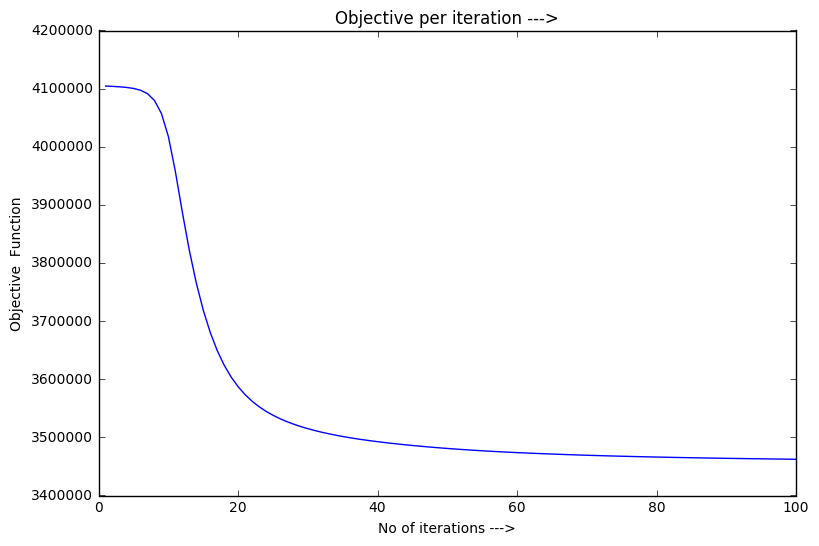

In [455]:
x_axis = np.arange(1, itera+1)
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.plot(x_axis,S)
plt.title("Objective per iteration --->")
plt.xlabel("No of iterations --->")
plt.ylabel("Objective  Function")
plt.show()

(b)

In [547]:
col = W.sum(axis=0)
W =  W / col[np.newaxis]

In [548]:
nyt_vocab=[]
fh2 = open('nyt_vocab.txt','r')
for i,line in enumerate(fh2):
    nyt_vocab.append(line.strip())
nyt_vocab=np.array(nyt_vocab)

In [560]:
ind[0][0]

218.0

In [589]:
d

['company-0.028838013764586463',
 'computer-0.015666331062901932',
 'product-0.015467771064352001',
 'industry-0.014456894775315967',
 'technology-0.013632567528635642',
 'sell-0.012170984422706473',
 'market-0.010641361160979697',
 'customer-0.010200479437343752',
 'store-0.00943889034450409',
 'sale-0.009207644078254558']

In [610]:
mat=np.empty([5,5])
ind=np.zeros([25,10])
li=np.empty(25,dtype=object)
for k in range(W.shape[1]):
    ind[k]=W[:,k].argsort()[-10:][::-1]
    d=[]
    ww=np.array(W[:,k])
    for i in range(len(ind[0])):
#         print(i)
#         print(nyt_vocab[ind[k][i].astype(int)])
#         print(ww[ind[k][i].astype(int)])
        v=nyt_vocab[ind[k][i].astype(int)]+"-"+ format(ww[ind[k][i].astype(int)],'.4f')
        d.append(v)
    li[k]=np.array(d)
# mat=pd.DataFrame(mat)


In [611]:
B = np.reshape(li, (-1, 5))
B=pd.DataFrame(B)
B.to_csv("file2.csv")

In [551]:
x=pd.DataFrame(nyt_vocab[ind[0].astype(int)],columns=["Topic {}".format(0+1)])
ww=np.array(W[:,0])
x=pd.concat([x,pd.DataFrame(ww[ind[0].astype(int)],columns=["Weight {}".format(0+1)])],axis=1)
for i in range(1,25):
    ww=np.array(W[:,i])
    x=pd.concat([x,pd.DataFrame(nyt_vocab[ind[i].astype(int)],columns=["Topic {}".format(i+1)])],axis=1)
    x=pd.concat([x,pd.DataFrame(ww[ind[i].astype(int)],columns=["Weight {}".format(i+1)])],axis=1)


In [552]:
x.ix[:,0:10]

,Topic 1,Weight 1,Topic 2,Weight 2,Topic 3,Weight 3,Topic 4,Weight 4,Topic 5,Weight 5
0,father,0.056328,bill,0.022150,woman,0.015975,company,0.026667,percent,0.035287
1,son,0.046972,proposal,0.014628,man,0.014837,stock,0.019620,rate,0.026486
2,mrs,0.044211,state,0.014613,life,0.012414,share,0.018341,rise,0.017837
3,family,0.037466,union,0.014257,love,0.010895,market,0.017909,increase,0.016383
4,mother,0.037349,pay,0.014158,write,0.010660,sell,0.017763,low,0.013842
5,daughter,0.036575,approve,0.013343,young,0.010150,buy,0.015054,average,0.013036
6,graduate,0.028263,propose,0.012532,story,0.009541,price,0.014424,economy,0.012841
7,child,0.025171,law,0.012050,friend,0.008512,percent,0.013919,price,0.011227
8,marry,0.023493,plan,0.010881,character,0.008306,sale,0.012949,growth,0.010347
9,receive,0.020379,pass,0.010095,book,0.008141,investor,0.012052,fall,0.010140


In [553]:
x.ix[:,10:20]

,Topic 6,Weight 6,Topic 7,Weight 7,Topic 8,Weight 8,Topic 9,Weight 9,Topic 10,Weight 10
0,game,0.023533,art,0.012669,plant,0.013244,mile,0.015145,case,0.015903
1,team,0.019471,artist,0.009805,water,0.010138,car,0.013649,official,0.015258
2,play,0.018338,design,0.008797,power,0.007058,hour,0.011644,lawyer,0.013811
3,win,0.016005,museum,0.008532,piece,0.007058,travel,0.010050,court,0.013571
4,season,0.015562,exhibition,0.007655,surface,0.007046,train,0.009806,law,0.011933
5,player,0.015272,display,0.007469,large,0.006592,air,0.008915,legal,0.009183
6,second,0.013290,color,0.007316,small,0.006075,drive,0.008494,file,0.008929
7,victory,0.009572,collection,0.007099,material,0.005630,trip,0.008389,investigation,0.008788
8,score,0.008935,open,0.007050,space,0.005616,driver,0.008133,judge,0.008343
9,coach,0.008397,painting,0.006434,inch,0.005455,ride,0.008063,issue,0.007965


In [554]:
x.ix[:,20:30]

,Topic 11,Weight 11,Topic 12,Weight 12,Topic 13,Weight 13,Topic 14,Weight 14,Topic 15,Weight 15
0,city,0.027834,president,0.042897,study,0.015280,food,0.019672,thing,0.017542
1,building,0.022819,executive,0.040063,expert,0.010320,serve,0.011026,feel,0.012831
2,resident,0.014984,chief,0.022135,group,0.009419,restaurant,0.010117,ask,0.012457
3,area,0.014544,director,0.019672,research,0.009136,eat,0.010020,tell,0.010029
4,build,0.013619,vice,0.017546,test,0.009021,fresh,0.009880,lot,0.009992
5,live,0.011927,name,0.015833,result,0.008306,pound,0.009148,really,0.009907
6,house,0.011498,chairman,0.014809,problem,0.008140,taste,0.008797,little,0.008506
7,community,0.011289,business,0.013411,effect,0.008054,cook,0.007972,happen,0.008104
8,home,0.010910,company,0.011992,number,0.007416,oil,0.007968,keep,0.007231
9,local,0.010700,job,0.011084,require,0.006991,add,0.007531,put,0.007154


In [555]:
x.ix[:,30:40]

,Topic 16,Weight 16,Topic 17,Weight 17,Topic 18,Weight 18,Topic 19,Weight 19,Topic 20,Weight 20
0,editor,0.018744,music,0.021240,police,0.031116,money,0.025071,history,0.013347
1,public,0.013218,play,0.017881,man,0.017575,cost,0.018030,book,0.013018
2,issue,0.011843,performance,0.013802,charge,0.017547,budget,0.015728,life,0.012636
3,article,0.008182,audience,0.012209,officer,0.015279,program,0.015153,write,0.009703
4,political,0.007651,film,0.010719,crime,0.013624,cut,0.014420,world,0.008494
5,power,0.006920,production,0.010362,arrest,0.013142,pay,0.013438,century,0.008375
6,question,0.006522,theater,0.010033,kill,0.011784,government,0.012071,american,0.007659
7,state,0.006504,stage,0.009698,prison,0.010155,fund,0.011075,culture,0.007381
8,argue,0.006246,perform,0.009449,trial,0.009671,dollar,0.011062,man,0.006647
9,nation,0.006145,dance,0.008977,death,0.008821,reduce,0.010230,great,0.006019


In [556]:
x.ix[:,40:50]

,Topic 21,Weight 21,Topic 22,Weight 22,Topic 23,Weight 23,Topic 24,Weight 24,Topic 25,Weight 25
0,american,0.013565,school,0.046930,campaign,0.020263,doctor,0.020254,company,0.028838
1,government,0.013095,student,0.037132,political,0.018001,health,0.018147,computer,0.015666
2,states,0.012796,class,0.019574,party,0.017232,hospital,0.018066,product,0.015468
3,military,0.012563,college,0.017540,vote,0.016520,medical,0.017724,industry,0.014457
4,official,0.011804,education,0.015186,election,0.015421,care,0.017134,technology,0.013633
5,war,0.011693,child,0.013899,candidate,0.015377,patient,0.016398,sell,0.012171
6,country,0.011056,program,0.013847,republican,0.015241,cause,0.015630,market,0.010641
7,leader,0.009586,teacher,0.013000,democratic,0.012515,drug,0.014392,customer,0.010200
8,force,0.009106,teach,0.011650,leader,0.011728,die,0.014343,store,0.009439
9,international,0.007258,university,0.010090,voter,0.009936,treatment,0.013590,sale,0.009208


In [557]:
x

,Topic 1,Weight 1,Topic 2,Weight 2,Topic 3,Weight 3,Topic 4,Weight 4,Topic 5,Weight 5,...,Topic 21,Weight 21,Topic 22,Weight 22,Topic 23,Weight 23,Topic 24,Weight 24,Topic 25,Weight 25
0,father,0.056328,bill,0.022150,woman,0.015975,company,0.026667,percent,0.035287,...,american,0.013565,school,0.046930,campaign,0.020263,doctor,0.020254,company,0.028838
1,son,0.046972,proposal,0.014628,man,0.014837,stock,0.019620,rate,0.026486,...,government,0.013095,student,0.037132,political,0.018001,health,0.018147,computer,0.015666
2,mrs,0.044211,state,0.014613,life,0.012414,share,0.018341,rise,0.017837,...,states,0.012796,class,0.019574,party,0.017232,hospital,0.018066,product,0.015468
3,family,0.037466,union,0.014257,love,0.010895,market,0.017909,increase,0.016383,...,military,0.012563,college,0.017540,vote,0.016520,medical,0.017724,industry,0.014457
4,mother,0.037349,pay,0.014158,write,0.010660,sell,0.017763,low,0.013842,...,official,0.011804,education,0.015186,election,0.015421,care,0.017134,technology,0.013633
5,daughter,0.036575,approve,0.013343,young,0.010150,buy,0.015054,average,0.013036,...,war,0.011693,child,0.013899,candidate,0.015377,patient,0.016398,sell,0.012171
6,graduate,0.028263,propose,0.012532,story,0.009541,price,0.014424,economy,0.012841,...,country,0.011056,program,0.013847,republican,0.015241,cause,0.015630,market,0.010641
7,child,0.025171,law,0.012050,friend,0.008512,percent,0.013919,price,0.011227,...,leader,0.009586,teacher,0.013000,democratic,0.012515,drug,0.014392,customer,0.010200
8,marry,0.023493,plan,0.010881,character,0.008306,sale,0.012949,growth,0.010347,...,force,0.009106,teach,0.011650,leader,0.011728,die,0.014343,store,0.009439
9,receive,0.020379,pass,0.010095,book,0.008141,investor,0.012052,fall,0.010140,...,international,0.007258,university,0.010090,voter,0.009936,treatment,0.013590,sale,0.009208
